# Project 4 Kaggle Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# import training dataset
train = pd.read_csv('../Kannada-MNIST/train.csv')

In [5]:
train.shape

(60000, 785)

In [53]:
sub_sample = train.sample(
    frac=0.2,
    replace=True,
    random_state=42,
    axis='index')

In [55]:
sub_sample.shape

(12000, 785)

In [54]:
sub_sample.tail(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7244,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6372,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39873,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19965,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51914,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16956,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40473,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13894,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45048,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
sub_sample.label.unique()

array([2, 5, 0, 8, 3, 4, 6, 1, 9, 7])

In [58]:
X = sub_sample.drop(columns = ['label'], axis=1)
y = sub_sample.label

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state = 42)

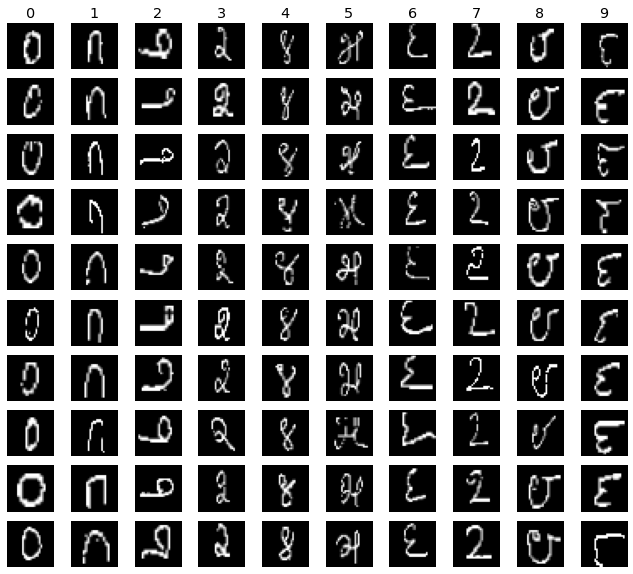

In [60]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

# I know these for loops look weird, but this way num_i is only computed once for each class
for i in range(10): # Column by column
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10): # Row by row
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier(max_depth=10,
                            min_samples_split =7,
                            min_samples_leaf = 3,
                            ccp_alpha=0.01,
                            random_state = 42)

In [63]:
# fit the model
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [64]:
# Evaluate model.
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.6955555555555556
Score on testing set: 0.687


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [80]:
# use gridsearch over the parameters on the training data
grid = GridSearchCV(estimator = dt,    # 必须加入 estimator = , param_grid= 才可以进入下边的参数优化
           param_grid = {'max_depth' : [2, 3, 5],
            'min_samples_split':[5, 10, 20],
            'min_samples_leaf' : [2, 4, 6],
            'ccp_alpha':[0.001, 0.01,0.1, 1]},
            cv=5)

In [82]:
%%time

grid.fit(X_train, y_train)

CPU times: user 2min 39s, sys: 5.77 s, total: 2min 44s
Wall time: 3min


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10,
                                              min_samples_leaf=3,
                                              min_samples_split=7,
                                              random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1],
                         'max_depth': [2, 3, 5], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [5, 10, 20]})

In [83]:
grid.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [84]:
grid.best_score_

0.643

In [85]:
print(f'Score on training set: {grid.score(X_train, y_train)}')
print(f'Score on testing set: {grid.score(X_test, y_test)}')

Score on training set: 0.6633333333333333
Score on testing set: 0.6496666666666666


In [108]:
dt_preds = dt.predict(X_test)
dt_preds

array([5, 8, 4, ..., 2, 3, 6])

In [112]:
from sklearn.metrics import accuracy_score

print('accuracy is',accuracy_score(dt_preds,y_test))

accuracy is 0.687


In [114]:
cm = confusion_matrix(dt_preds, y_test)
print(cm)

[[247   2   5  22   4   0   1   9   6  38]
 [ 22 297  10  20  13  27  19   8  40  39]
 [  0   0 236   0   0   1   0   0   0   0]
 [  0   3  13 165  38  33  19  65   0  23]
 [  0   0   1   6 170  23   0  13   1  15]
 [  0   4  13  19   7 196   3   0   1   2]
 [ 11   1  11  45   9   9 225  44  37   7]
 [  1   0   6  22   4   0  42 140   1   3]
 [ 23   0   2   3   8   0   0   2 206   4]
 [  0   2   1   2  29   8   0   7   7 179]]


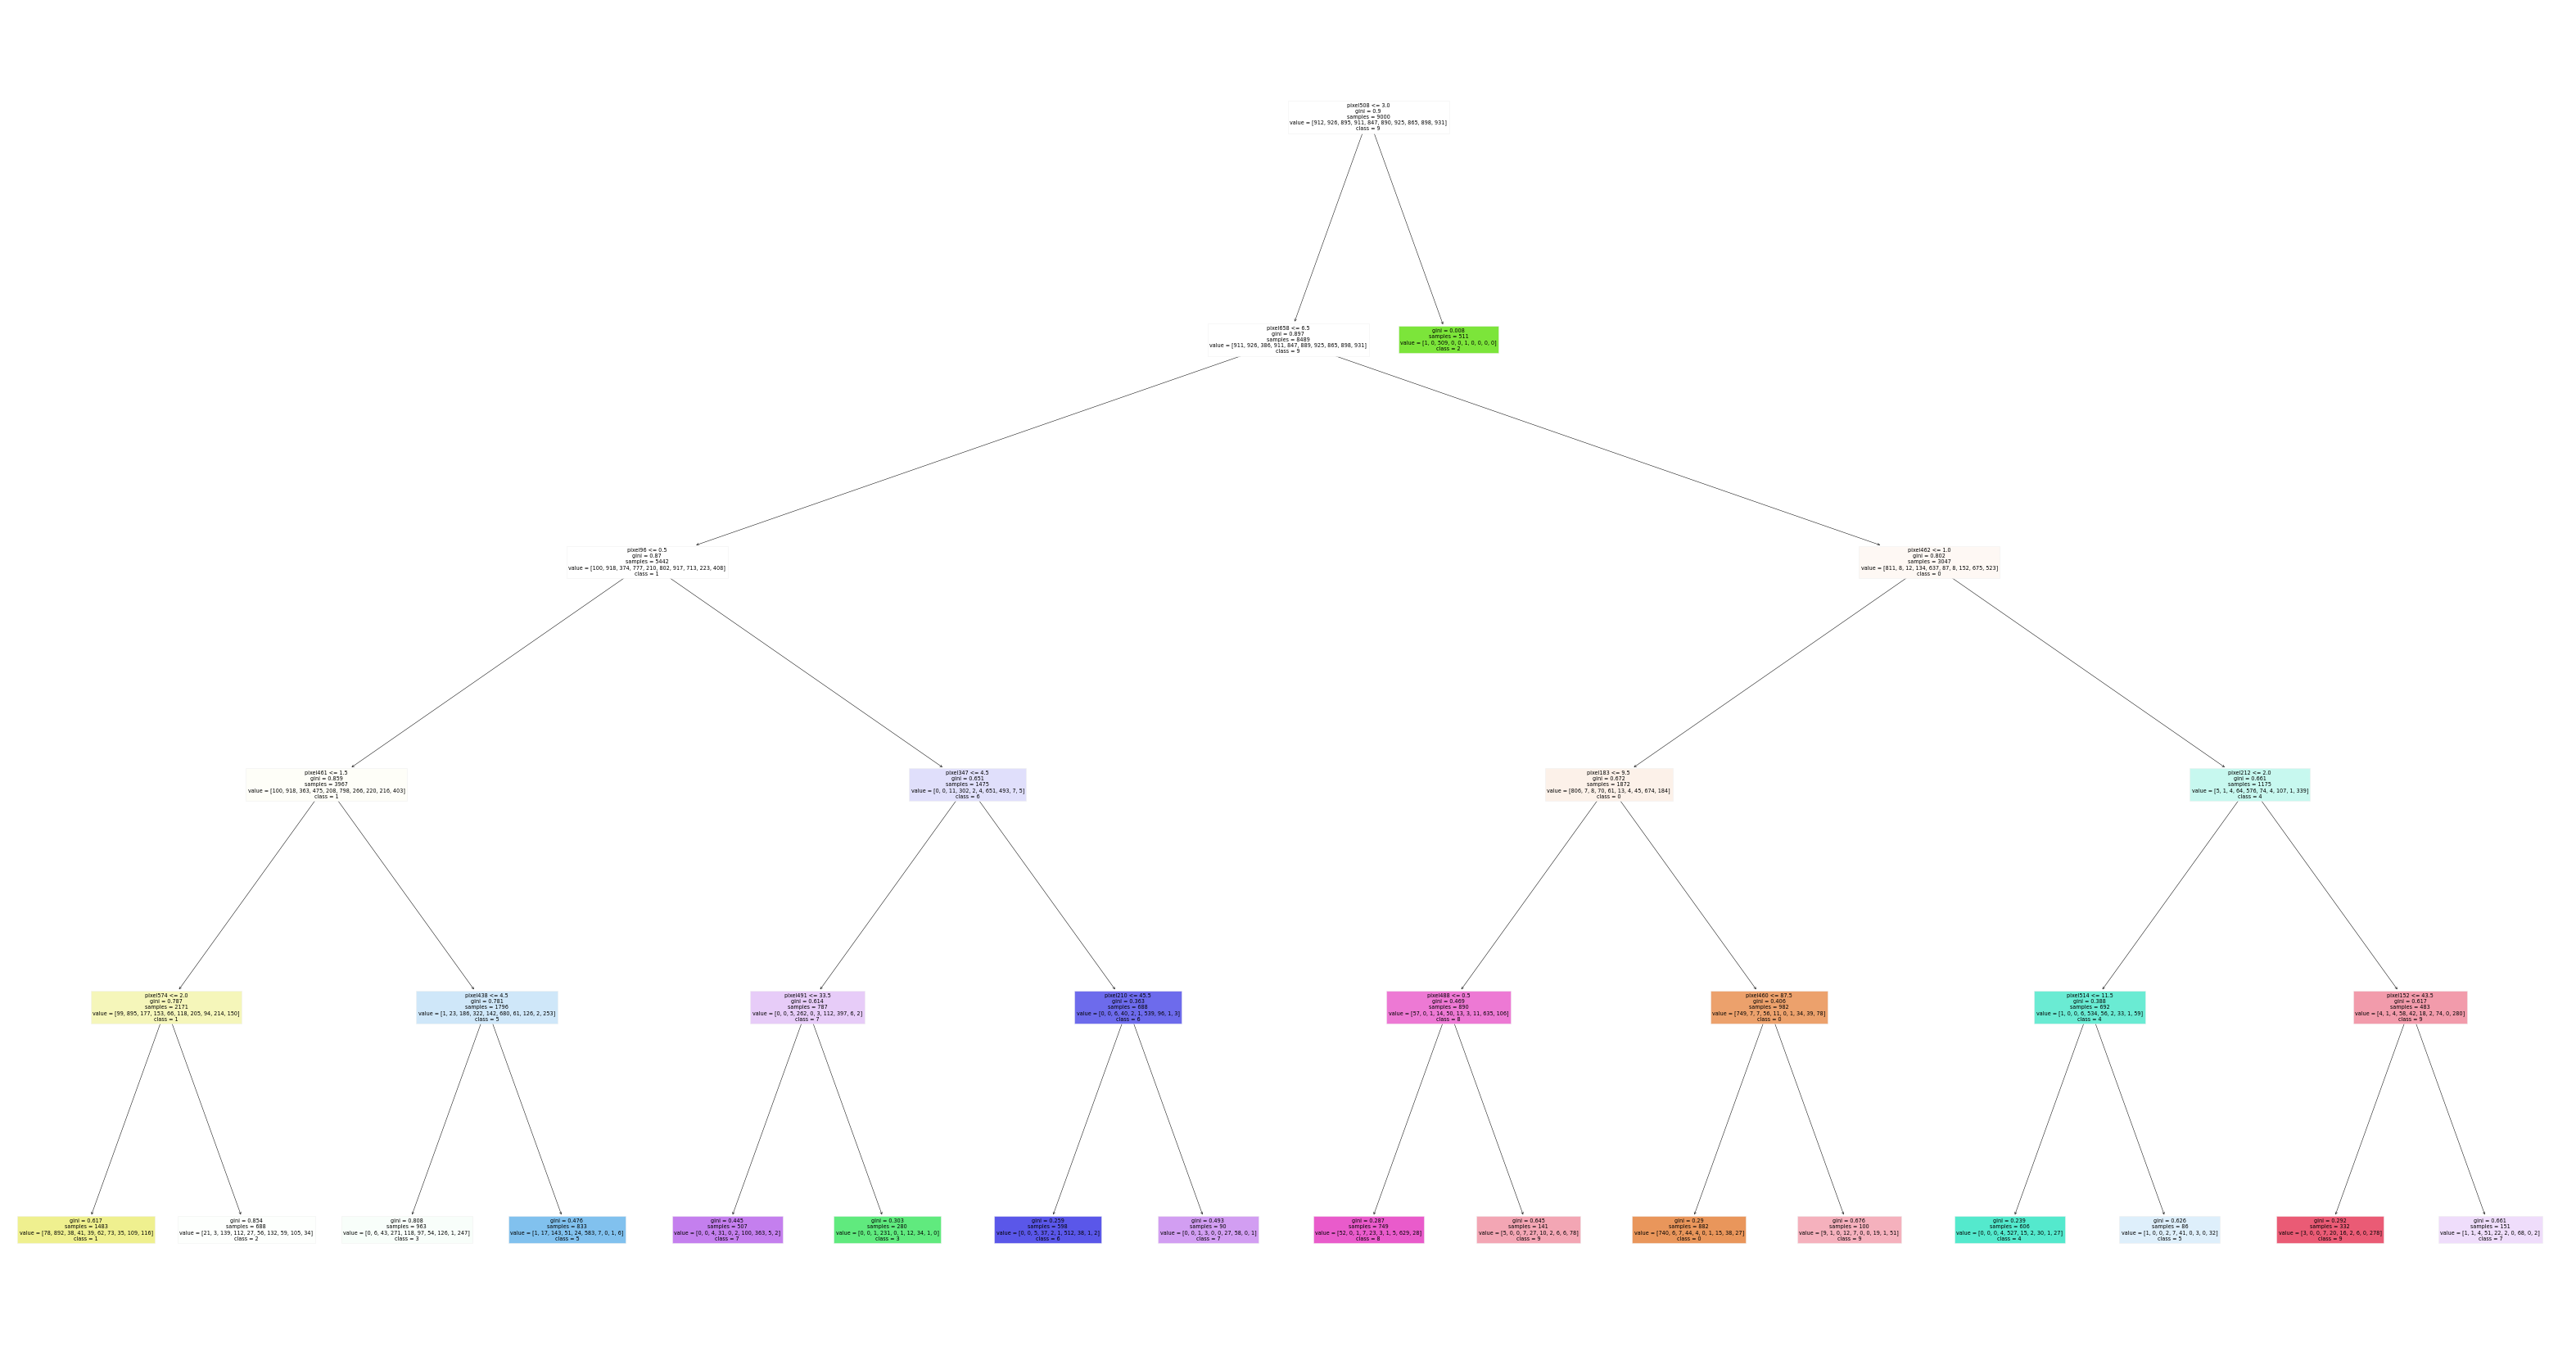

In [92]:
# Import plot_tree from sklearn.tree module.
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (50, 30))

# Plot our tree.
plot_tree(grid.best_estimator_,
          feature_names = X_train.columns,
          class_names = ['0','1','2','3','4','5','6','7','8','9'],
          filled = True);

#RandomForestTree

In [93]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [115]:
# instantiate RandomForest Classifier
rfc_default = RandomForestClassifier()

In [116]:
rfc_default.fit(X_train, y_train)

RandomForestClassifier()

In [117]:
rfc_default.score(X_train, y_train), rfc_default.score(X_test, y_test), 

(1.0, 0.9663333333333334)

In [98]:
rfc2 = RandomForestClassifier(random_state = 42)

In [102]:
rfc2_params = {'rfc2__n_estimators': [750, 1000],
          'rfc2__max_depth': [17, 19],
         'rfc2__min_samples_split': [4, 5],
         'rfc2__min_samples_leaf': [2, 3],
         'rfc2__max_features': ['auto']}

In [103]:
pipe = Pipeline([
    ('rfc2' , RandomForestClassifier(random_state = 42)) ])

rfc2_params = {'rfc2__n_estimators': [750, 1000],
          'rfc2__max_depth': [17, 19],
         'rfc2__min_samples_split': [4, 5],
         'rfc2__min_samples_leaf': [2, 3],
         'rfc2__max_features': ['auto']}

rfc = RandomizedSearchCV(
    estimator= pipe,
    param_distributions = rfc2_params,
    cv=5,
    n_iter=75,
    n_jobs=-1,
    verbose=0,
    random_state=42
    
)

In [104]:
rfc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 16 is smaller than n_iter=75. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rfc2',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'rfc2__max_depth': [17, 19],
                                        'rfc2__max_features': ['auto'],
                                        'rfc2__min_samples_leaf': [2, 3],
                                        'rfc2__min_samples_split': [4, 5],
                                        'rfc2__n_estimators': [750, 1000]},
                   random_state=42)

In [105]:
rfc.best_params_

{'rfc2__n_estimators': 1000,
 'rfc2__min_samples_split': 4,
 'rfc2__min_samples_leaf': 2,
 'rfc2__max_features': 'auto',
 'rfc2__max_depth': 19}

In [106]:
rfc.best_score_

0.9663333333333334

In [107]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.9978888888888889, 0.9633333333333334)

In [131]:
rfc_preds = rfc_default.predict(X_test)
rfc_preds

array([5, 8, 3, ..., 2, 3, 5])

In [133]:
rfc_preds.shape

(3000,)

In [132]:
y_test.shape

(3000,)

In [134]:
print('accuracy is',accuracy_score(rfc_preds,y_test))

accuracy is 0.9663333333333334


In [135]:
cm = confusion_matrix(rfc_preds, y_test)
print(cm)

[[291   1   3   5   0   0   0   0   0   0]
 [  7 308   0   0   0   0   0   0   1   0]
 [  1   0 292   0   0   0   0   0   0   0]
 [  5   0   0 289   3   2   5  11   0   0]
 [  0   0   1   5 276   5   0   3   0   2]
 [  0   0   2   0   2 289   1   0   2   0]
 [  0   0   0   0   0   0 299  16   0   5]
 [  0   0   0   5   0   0   4 258   0   0]
 [  0   0   0   0   1   1   0   0 294   0]
 [  0   0   0   0   0   0   0   0   2 303]]


In [ ]:
# random forest tree using full data

In [197]:
Xf = train.drop(columns = ['label'], axis=1)
yf = train.label

In [198]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.25, stratify = yf, random_state = 42)

In [199]:
rfc_default.fit(Xf_train, yf_train)

RandomForestClassifier()

In [200]:
rfc_default.score(Xf_train, yf_train), rfc_default.score(Xf_test, yf_test), 

(1.0, 0.9788666666666667)

In [201]:
pipe = Pipeline([
    ('rfc2' , RandomForestClassifier(random_state = 42)) ])

rfc2_params = {'rfc2__n_estimators': [750, 1000],
          'rfc2__max_depth': [17, 19],
         'rfc2__min_samples_split': [4, 5],
         'rfc2__min_samples_leaf': [2, 3],
         'rfc2__max_features': ['auto']}

rfc = RandomizedSearchCV(
    estimator= pipe,
    param_distributions = rfc2_params,
    cv=5,
    n_iter=75,
    n_jobs=-1,
    verbose=0,
    random_state=42
    
)

In [ ]:
%%time  
rfc.fit(Xf_train, yf_train) # unfinished

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 16 is smaller than n_iter=75. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
rfc_default.fit()

#Extremely Randomized Tress(Extra Trees)

In [136]:
et = ExtraTreesClassifier(bootstrap=True)

In [137]:
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True)

In [138]:
et.score(X_train, y_train), et.score(X_test, y_test)

(1.0, 0.9636666666666667)

In [139]:
f = {'Column Name':X_train.columns,'Feature Importance':et.feature_importances_}
et_fi = pd.DataFrame(f)

et_fi.sort_values(by=['Feature Importance'], ascending = False).head(10)

,Column Name,Feature Importance
657,pixel657,0.011109
659,pixel659,0.010580
658,pixel658,0.009612
463,pixel463,0.009505
686,pixel686,0.009360
183,pixel183,0.009194
461,pixel461,0.008776
155,pixel155,0.008764
491,pixel491,0.008494
211,pixel211,0.008081


In [140]:
pipe = Pipeline([
    ('et', ExtraTreesClassifier())
])

In [143]:
et_params = {
     'et__n_estimators': [500],
     'et__max_depth': [11, 17],
     'et__min_samples_split': [3, 5],
     'et__min_samples_leaf': [3 ,5],
     'et__bootstrap': [True],
    'et__max_features': ['auto'],
     'et__class_weight': ['balanced']
 }

In [144]:
et = RandomizedSearchCV(
    estimator= pipe,
    param_distributions = et_params,
    cv=5,
    n_iter=75,
    n_jobs=-1,
    verbose=0,
    random_state=42
    
)

In [145]:
%%time
et.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=75. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 12.9 s, sys: 490 ms, total: 13.4 s
Wall time: 4min 33s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('et', ExtraTreesClassifier())]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'et__bootstrap': [True],
                                        'et__class_weight': ['balanced'],
                                        'et__max_depth': [11, 17],
                                        'et__max_features': ['auto'],
                                        'et__min_samples_leaf': [3, 5],
                                        'et__min_samples_split': [3, 5],
                                        'et__n_estimators': [500]},
                   random_state=42)

In [146]:
et.score(X_train, y_train), et.score(X_test, y_test)

(0.9908888888888889, 0.9576666666666667)

In [173]:
# linear regression
from statsmodels.api import OLS, add_constant
import statsmodels.api as sm
X_addconstant = sm.add_constant(X_train)
model = sm.OLS(endog= y_train, exog=X_addconstant)

In [174]:
result = model.fit()

In [175]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     49.73
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:24:52   Log-Likelihood:                -15165.
No. Observations:                9000   AIC:                         3.164e+04
Df Residuals:                    8343   BIC:                         3.631e+04
Df Model:                         656                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8987      0.076     64.041      0.000       4.749       5.049
pixel0      1.932e-12   4.18e-14     46.193      0.000    1.85e-12    2.01e-12
pixel1     -1.665e-12   2.99e-14    -55.622      0.000   -1.72e-12   -1.61e-12
pixel2      9.431e-14   3.65e-14      2.581      0.010    2.27e-14    1.66e-13
pixel3      4.884e-13   4.48e-14     10.896      0.000    4.01e-13    5.76e-13
pixel4     -1.182e-13    1.5e-14     -7.881      0.000   -1.48e-13   -8.88e-14
pixel5          6e-13   1.58e-14     37.980      0.000    5.69e-13    6.31e-13
pixel6         0.0098      0.009      1.139      0.255      -0.007       0.027
pixel7         0.0029      0.003      1.139      0.255      -0.002       0.008
pixel8     -7.242e-14   2.31e-14     -3.139      0.002   -1.18e-13   -2.72e-14
pixel9         0.0026      0.005      0.466      0.641      -0.008       0.013
pixel10        0.0005      0.006      0.090      0.928      -0.011       0.012
pixel11        0.0030      0.005      0.592      0.554      -0.007       0.013
pixel12       -0.0006      0.005     -0.115      0.908      -0.010       0.009
pixel13        0.0026      0.004      0.652      0.515      -0.005       0.010
pixel14       -0.0060      0.007     -0.917      0.359      -0.019       0.007
pixel15        0.0159      0.020      0.781      0.435      -0.024       0.056
pixel16       -0.0062      0.010     -0.647      0.518      -0.025       0.013
pixel17       -0.0036      0.005     -0.744      0.457      -0.013       0.006
pixel18    -4.139e-14   1.77e-14     -2.343      0.019    -7.6e-14   -6.76e-15
pixel19    -3.323e-14   3.82e-14     -0.871      0.384   -1.08e-13    4.16e-14
pixel20    -4.971e-14    3.3e-14     -1.505      0.132   -1.14e-13     1.5e-14
pixel21     4.261e-14   2.69e-14      1.586      0.113   -1.01e-14    9.53e-14
pixel22     2.243e-14   2.94e-14      0.764      0.445   -3.51e-14       8e-14
pixel23    -2.436e-14   4.64e-14     -0.525      0.599   -1.15e-13    6.65e-14
pixel24     4.071e-14   4.98e-14      0.818      0.413   -5.68e-14    1.38e-13
pixel25     1.798e-14   5.84e-14      0.308      0.758   -9.66e-14    1.33e-13
pixel26     6.274e-14   8.53e-14      0.735      0.462   -1.05e-13     2.3e-13
pixel27     5.044e-14   4.26e-14      1.185      0.236    -3.3e-14    1.34e-13
pixel28    -6.203e-14   1.77e-14     -3.510      0.000   -9.67e-14   -2.74e-14
pixel29    -1.484e-15   1.97e-14     -0.075      0.940   -4.01e-14    3.71e-14
pixel30     5.916e-16   7.63e-14      0.008      0.994   -1.49e-13     1.5e-13
pixel31    -1.188e-14   5.96e-15     -1.993      0.046   -2.36e-14   -1.94e-16
pixel32    -2.378e-14   2.86e-14     -0.832      0.406   -7.98e-14    3.23e-14
pixel33     9.376e-15   3.89e-14      0.241      0.809   -6.68e-14    8.56e-14
pixel34        0.0029      0.003      1.139      0.255      -0.002       0.008
pi

In [177]:
Xtest_addconstant = sm.add_constant(X_test)
ols_preds = result.predict(Xtest_addconstant)

In [190]:
# linear regression()
lr = LinearRegression(normalize=True, 
                     n_jobs=-1)

In [191]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [187]:
# sc= StandardScaler()
# Z_train = sc.fit_transform(X_train)
# Z_test = sc.transform(X_test)

In [192]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7943793906342802, -1.6714283927661014e+28)

In [194]:
#basline model
y.value_counts(normalize=True)

9    0.103417
1    0.102917
6    0.102833
0    0.101333
3    0.101250
8    0.099750
2    0.099417
5    0.098917
7    0.096083
4    0.094083
Name: label, dtype: float64